# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [89]:
# Initial imports
import os
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv
import nltk as nltk
from newsapi import NewsApiClient
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mattpretel/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [90]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [91]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [92]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(
    q="Bitcoin",
    language="en"
)

In [93]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(
    q="Ethereum",
    language="en"
)

In [94]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964
1,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882
2,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772
3,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928
4,2022-05-16,"As a kid, I remember when my father tried to u...",0.3818,0.114,0.052,0.833


In [95]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865
1,2022-05-23,GameStop has officially thrown itself headlong...,-0.1027,0.000,0.040,0.960
2,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879
3,2022-05-04,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945
4,2022-05-23,GameStop is going all-in on crypto. The video ...,0.1280,0.046,0.000,0.954


In [96]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.119220,0.063350,0.084900,0.851800
std,0.404397,0.060985,0.075734,0.100743
min,-0.859300,0.000000,0.000000,0.557000
25%,-0.386825,0.000000,0.057250,0.827000
50%,-0.284600,0.055000,0.071500,0.878000
75%,0.156025,0.085000,0.103750,0.923000
max,0.750600,0.202000,0.300000,0.964000


In [97]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.088800,0.032800,0.048600,0.918700
std,0.343530,0.051042,0.043472,0.051321
min,-0.690800,0.000000,0.000000,0.822000
25%,-0.284450,0.000000,0.000000,0.875500
50%,-0.153100,0.000000,0.050000,0.935000
75%,0.045025,0.051750,0.069000,0.955000
max,0.690800,0.178000,0.178000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC

Q: Which coin had the highest compound score?

A: BTC

Q. Which coin had the highest positive score?

A: BTC

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [108]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [109]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stopwords = set(stopwords.words('english'))
custom_stopwords = set(['bitcoin', 'ethereum'])


# Expand the default stopwords list if necessary
full_stopwords = stopwords.union(custom_stopwords)

In [110]:
# Complete the tokenizer function

def tokenizer(text):
    """Tokenizes text."""
    
    # Create a tokenized list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = [word.lower() for word in words]

    # Remove the punctuation from text
    words = [word.lower() for word in words if re.match(regex_punctuation_match_str, word) is None]

    # Lemmatize Words into root words
    words = [lemmatizer.lemmatize(word) for word in words]

    # Remove the stop words
    words = [word.lower() for word in words if word.lower() not in full_stopwords]

    return words

In [111]:
# Create a new tokens column for Bitcoin
btc_tokens = []
for text in btc_df["text"].values:
    btc_tokens.append(tokenizer(text))

btc_df["tokens"] = btc_tokens
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964,"[even, though, number, crypto, space, odeniran..."
1,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882,"[mining, site, powered, otherwise, lost, gas, ..."
2,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772,"[warren, buffett, ha, always, skeptic, billion..."
3,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928,"[image, source, getty, image, value, continued..."
4,2022-05-16,"As a kid, I remember when my father tried to u...",0.3818,0.114,0.052,0.833,"[kid, remember, father, tried, use, broom, han..."


In [112]:
# Create a new tokens column for Ethereum
eth_tokens = []
for text in eth_df["text"].values:
    eth_tokens.append(tokenizer(text))

eth_df["tokens"] = eth_tokens
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865,"[meta, ha, revealed, nfts, work, instagram, te..."
1,2022-05-23,GameStop has officially thrown itself headlong...,-0.1027,0.000,0.040,0.960,"[gamestop, ha, officially, thrown, headlong, w..."
2,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879,"[dollar, cryptocurrency, company, ha, apologis..."
3,2022-05-04,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945,"[bored, ape, yacht, club, creator, yuga, lab, ..."
4,2022-05-23,GameStop is going all-in on crypto. The video ...,0.1280,0.046,0.000,0.954,"[gamestop, going, crypto, video, game, retaile..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [113]:
from collections import Counter
from nltk import ngrams

In [114]:
# Generate the Bitcoin N-grams where N=2
btc_ngrams = [ Counter(ngrams(token, n=2)) for token in btc_df["tokens"].values ]
btc_ngrams[0]


Counter({('even', 'though'): 1,
         ('though', 'number'): 1,
         ('number', 'crypto'): 1,
         ('crypto', 'space'): 1,
         ('space', 'odeniran'): 1,
         ('odeniran', 'say'): 1,
         ('say', 'woman'): 1,
         ('woman', 'still'): 1,
         ('still', 'underrepresented'): 1,
         ('underrepresented', 'ive'): 1,
         ('ive', 'space'): 1,
         ('space', 'im'): 1,
         ('im', 'black'): 1,
         ('black', 'person'): 1,
         ('person', 'woman'): 1,
         ('woman', 'b…'): 1,
         ('b…', 'char'): 1})

In [115]:
# Generate the Ethereum N-grams where N=2
eth_ngrams = [ Counter(ngrams(token, n=2)) for token in eth_df["tokens"].values ]
eth_ngrams[0]

Counter({('meta', 'ha'): 1,
         ('ha', 'revealed'): 1,
         ('revealed', 'nfts'): 1,
         ('nfts', 'work'): 1,
         ('work', 'instagram'): 1,
         ('instagram', 'test'): 1,
         ('test', 'show'): 1,
         ('show', 'bought'): 1,
         ('bought', 'created'): 1,
         ('created', 'free'): 1,
         ('free', 'connecting'): 1,
         ('connecting', 'instagram'): 1,
         ('instagram', 'account'): 1,
         ('account', 'compatible'): 1,
         ('compatible', 'digital'): 1,
         ('digital', 'walle…'): 1,
         ('walle…', 'char'): 1})

In [116]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [117]:
# Use token_count to get the top 10 words for Bitcoin
btc_words = []
for token in btc_df.tokens:
    btc_words += token

token_count(btc_words, 10)

[('char', 19),
 ('cryptocurrency', 10),
 ('world', 6),
 ('week', 6),
 ('new', 6),
 ('blockchain', 5),
 ('may', 5),
 ('reuters', 5),
 ('investor', 4),
 ('last', 4)]

In [118]:
# Use token_count to get the top 10 words for Ethereum
eth_words = []
for token in eth_df.tokens:
    eth_words += token

token_count(eth_words, 10)

[('char', 20),
 ('cryptocurrency', 12),
 ('ha', 7),
 ('may', 6),
 ('nft', 5),
 ('last', 5),
 ('world', 5),
 ('nfts', 4),
 ('digital', 4),
 ('sale', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [119]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

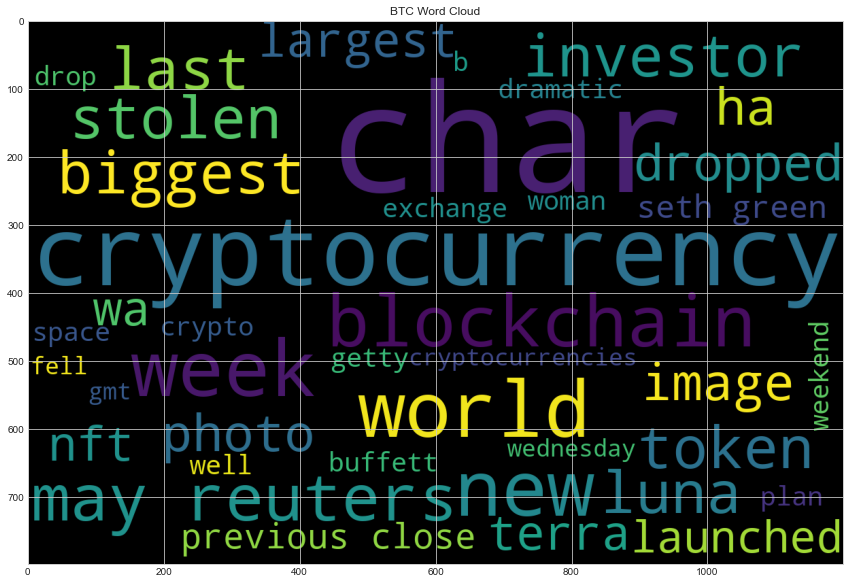

In [120]:
# Generate the Bitcoin word cloud
btc_words_cloud = ' '.join(btc_words)
num_words = 40
wc = WordCloud(width=1200, height=800, max_words=num_words).generate(btc_words_cloud)
plt.title(f"BTC Word Cloud")
plt.imshow(wc)


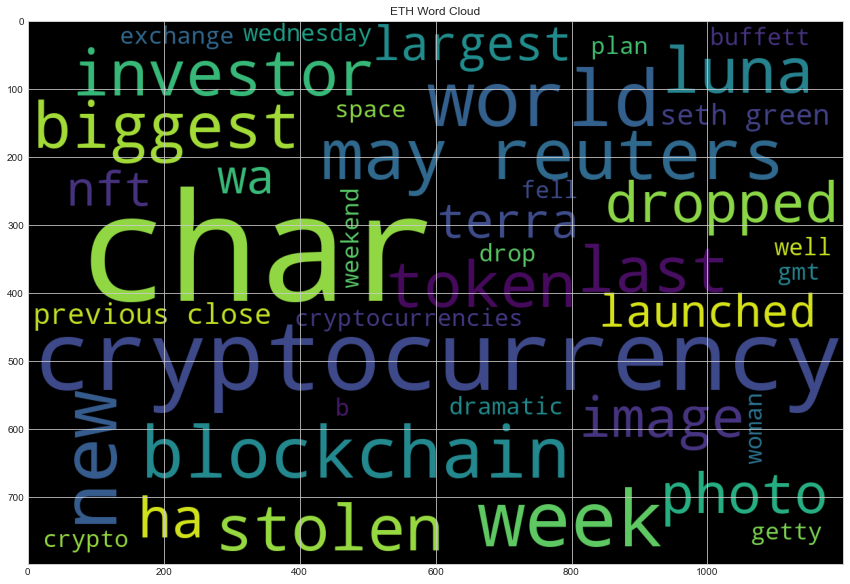

In [121]:
# Generate the Ethereum word cloud
eth_words_cloud = ' '.join(btc_words)
num_words = 40
wc = WordCloud(width=1200, height=800, max_words=num_words).generate(eth_words_cloud)
plt.title(f"ETH Word Cloud")
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [122]:
import spacy
from spacy import displacy

In [123]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [124]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [125]:
# Concatenate all of the Bitcoin text together
btc_total = ' '.join(btc_df["text"].values)

In [126]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_total)

# Add a title to the document
btc_ner.user_data["title"] = "All BTC Text"

In [127]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [128]:
# List all Entities
print([ent.text for ent in btc_ner.ents])

['Odeniran', 'Linden', 'Texas', 'April 4th, 2022', 'Photo', 'FRANCOIS PICARD/AFP', 'Getty Images', 'Warren Buffett', 'the weekend', 'Getty Images\r\n', 'the weekend', '34,000', '27,630', 'Coinbase', '+2164', 'nearly three feet', 'Last week', 'Fidelity Investments', 'the US Treasury', 'Grayson Blackmon', 'Oliyarnyk / CC-BY-SA-4.0', 'Michael Chobanian', 'the Blockchain Association of Ukraine', 'Bitcoin', 'Gucci handbag', 'week', 'Kristy Kilburn', 'May 11', 'Reuters', '7.23%', '28,758.29', 'GMT', 'Wednesday', '2,241.68', '40.4%', 'May 4', 'Reuters', '5.7%', '39,862.84', 'Wednesday', '2,102.94', '20.9%', 'year', 'May 9', 'Reuters', '7.81%', '31,333.41', 'GMT', 'Monday', '2,655.98', '35%', 'last July', '33,000', 'the week', 'last week', 'Fed', 'Mexican', 'North London', 'a few weeks ago', '+2779', 'May 24', 'Reuters', 'its ninth week', 'May 10', 'Reuters', "Seth Green's", 'NFT', 'two', "Seth Green's", 'Nike', 'today', "Seth Green's", 'NFT', '] Sam Bankman-Fried', 'the digital asset exchange

---

### Ethereum NER

In [129]:
# Concatenate all of the Ethereum text together
eth_total = ' '.join(btc_df["text"].values)

In [130]:
# Run the NER processor on all of the text
eth_ner = nlp(btc_total)


# Add a title to the document
eth_ner.user_data["title"] = "All ETH Text"

In [131]:
# Render the visualization
displacy.render(eth_ner, style = 'ent')

In [132]:
# List all Entities
print([ent.text for ent in eth_ner.ents])

['Odeniran', 'Linden', 'Texas', 'April 4th, 2022', 'Photo', 'FRANCOIS PICARD/AFP', 'Getty Images', 'Warren Buffett', 'the weekend', 'Getty Images\r\n', 'the weekend', '34,000', '27,630', 'Coinbase', '+2164', 'nearly three feet', 'Last week', 'Fidelity Investments', 'the US Treasury', 'Grayson Blackmon', 'Oliyarnyk / CC-BY-SA-4.0', 'Michael Chobanian', 'the Blockchain Association of Ukraine', 'Bitcoin', 'Gucci handbag', 'week', 'Kristy Kilburn', 'May 11', 'Reuters', '7.23%', '28,758.29', 'GMT', 'Wednesday', '2,241.68', '40.4%', 'May 4', 'Reuters', '5.7%', '39,862.84', 'Wednesday', '2,102.94', '20.9%', 'year', 'May 9', 'Reuters', '7.81%', '31,333.41', 'GMT', 'Monday', '2,655.98', '35%', 'last July', '33,000', 'the week', 'last week', 'Fed', 'Mexican', 'North London', 'a few weeks ago', '+2779', 'May 24', 'Reuters', 'its ninth week', 'May 10', 'Reuters', "Seth Green's", 'NFT', 'two', "Seth Green's", 'Nike', 'today', "Seth Green's", 'NFT', '] Sam Bankman-Fried', 'the digital asset exchange

---